#### IPT.

# TD 5 - Premiers algorithmes de tri

### Tri par sélection

Le tri par sélection est un algorithme de tri assez rudimentaire ; son fonctionnement est le suivant : on parcourt la liste à trier de la gauche vers la droite en échangeant à chaque fois l'élément rencontré avec le plus petit élément situé à sa droite. En d'autres termes, on trie en retenant d'abord le plus petit élément de la liste, puis le deuxième plus petit, puis le troisième, etc.

Si la liste de départ est `[11,23,7,4]`, le processus passera par les étapes suivantes :

    [11, 23, 7, 4] (liste de départ)
    [4, 23, 7, 11] (on échange le premier élément 11 avec le  minimum 4)
    [4, 7, 23, 11] (on échange le deuxième élément 23 avec le minimum restant 7)
    [4, 7, 11, 23] (on échange le troisième élément 23 avec le minimum restant 11)

On commence par écrire une fonction `min_from_index` prenant deux arguments, une liste `l` et un indice `i` et recherchant l'indice du plus petit élément de `l` à partir de  `i`. Par exemple :

    >>> min_from_index([11, 23, 7, 4], 0)
    3

Puis on écrit la fonction `tri_selection` prenant une liste en argument et effectuant le tri. Comme le tri se fait en place (on modifie la liste), la fonction ne retournera rien.

In [3]:
def min_from_index(l, i):
    mymin = i
    for j in range(i+1, len(l)):
        if l[j] < l[mymin]: mymin = j
    return mymin

def tri_selection(l):
    # on parcourt tous les éléments sauf le dernier
    for i in range(len(l)-1):
        mymin = min_from_index(l, i)
        l[i], l[mymin] = l[mymin], l[i]

a = [12,3,54,21,3,11,19]
tri_selection(a)
a

[3, 3, 11, 12, 19, 21, 54]

Afin de visualiser l'évolution du nombre d'opérations nécessaires au tri par sélection en fonction de la taille de la liste, on modifiera le code ci-dessus en ajoutant un compteur qui sera incrémenté à chaque itération de la fonction au sein de la fonction `min_from_index` ; désormais la fonction `tri_selection` triera la liste mais retournera la valeur (cumulée) de ce compteur en fin de tri.

À l'aide du module `matplotlib`, on représentera la valeur de ce compteur pour des listes de taille 1 à 50. L'utilisation de ce module sera présentée au vidéo-projecteur pendant le T.D.

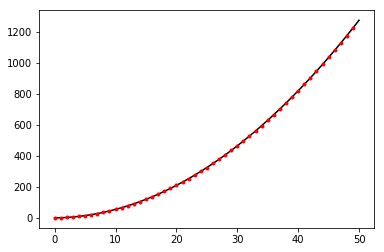

In [4]:
%matplotlib inline

from random import randrange
import matplotlib.pyplot as plt

def tri_selection(l):
    compteur = 0
    def min_from_index(l, i):
        nonlocal compteur
        mymin = i
        for j in range(i+1, len(l)):
            if l[j] < l[mymin]: mymin = j
            compteur += 1
        return mymin
    for i in range(len(l)):
        mymin = min_from_index(l, i)
        l[i], l[mymin] = l[mymin], l[i]
    return compteur
    

l = []
nsteps = []
for _ in range(50):
    l.append(randrange(0,1000))
    nsteps.append( tri_selection(l))

plt.plot([ x*(x+1)/2 for x in range(len(nsteps)+1)], "k")
plt.plot(nsteps,".r")

### Tri à bulle

Contrairement au tri par sélection, le tri à bulle n'a pas un nombre d'opérations constant : si la liste est déjà triée (ou presque), le tri pourra être assez rapide.

L'idée est la suivante : on parcourt les éléments de la gauche vers la droite ; à chaque fois que l'on rencontre un élément plus petit que l'élément situé à sa gauche, on procède à un échange et l'on continue ensuite d'avancer vers la droite. Tant que ce parcours a donné lieu à au moins un échange, on recommence. L'algorithme prend fin quand la liste a été entièrement parcourue sans qu'aucun échange n'ait été effectué.

Si la liste de départ est [11,23,7,4], le processus passera par les étapes suivantes :

    [11, 23, 7, 4] (liste de départ)
    [11, 7, 23, 4] (première boucle, échange du 23 et du 7)
    [11, 7, 4, 23] (première boucle, échange du 23 et du 4)
    [7, 11, 4, 23] (deuxième boucle, échange du 11 et du 7)
    [7, 4, 11, 23] (deuxième boucle, échange du 11 et du 4)
    [4, 7, 11, 23] (troisième boucle, échange du 7 et du 4)
    [4, 7, 11, 23] (aucun échange au terme de la quatrième boucle)

Écrire une fonction `bubble_sort` prenant en argument une liste `l` et la triant grâce au tri à bulle ; la fonction modifiera en place la liste `l` et retournera le nombre de boucles principales effectuées.

In [6]:
def bubble_sort(l):
    n = len(l)
    stable = False
    nsteps = 0
    while not stable:
        stable = True
        for k in range(1, n):
            if l[k] < l[k-1]:
                l[k-1], l[k] = l[k], l[k-1]
                stable = False
        nsteps += 1
    return nsteps

à l'aide du module `matplotlib`, tracer la courbe représentant le nombre de boucles nécessaires pour trier une liste de 1000 éléments en fonction d'un ordre initial de plus en plus aléatoire (on commence donc par trier une liste déjà triée, puis on trie une liste légèrement mélangée, etc.).

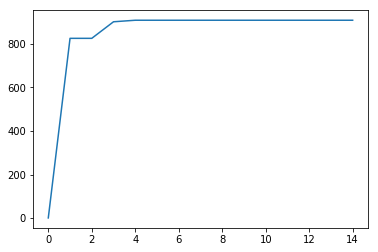

In [20]:
%matplotlib inline

from random import randrange
import matplotlib.pyplot as plt

def mini_biased_shuffle(l, k):
    n = len(l)
    for _ in range(k):
        a, b = randrange(0, n), randrange(0, n)
        l[a], l[b] = l[b], l[a]

ltest = list(range(1000))
nsteps = []
for _ in range(15):
    copy = list(ltest)
    nsteps.append( bubble_sort(copy) )
    mini_biased_shuffle(ltest, 5)

plt.plot(nsteps)

### Tri comptage

Le tri-comptage est intéressant pour trier une liste d'éléments dans un domaine fini, notamment lorsque les valeurs possibles sont en nombre assez restreint. On commence par calculer l'histogramme des valeurs de la liste (on compte combien de fois chaque valeur possible apparaît dans la liste), puis on construit la liste triée à partir de cet histogramme.

Supposons une liste d'éléments dans `{0, 1, 2, 3}`, par exemple la liste `[2,3,1,0,1,1,3,0,2]` ; on construit l'histogramme des quatre valeurs `[2, 3, 2, 2]`. On sait alors que la liste triée sera constituée de deux fois la première valeur, puis trois fois la deuxième valeur, etc., soit `[0, 0, 1, 1, 1, 2, 2, 3, 3]`.

Écrire une fonction `tri_comptage` prenant deux arguments : le premier argument `l` est une liste à trier de valeurs numériques entières à partir de 0 ; le second argument est le nombre `nitems` de valeurs possibles pour chaque élément de la liste. On suppose que la liste `l` ne comporte que des valeurs entre `0` et `nitems-1`. La fonction `tri_comptage` construira d'abord l'histogramme des `nitems` valeurs puis constuira la liste triée.

In [35]:
# on trie des entiers entre 0 et nitems-1
def tri_comptage(l, nitems):
    histo = [0] * nitems
    for e in l:
        histo[e] += 1
    l = []
    for k in range(nitems):
        l.extend( [k]*histo[k])
    return l

ltest = [ randrange(0, 21) for _ in range(100) ]
print(tri_comptage(ltest, 21))


[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20]


_La variante suivante est réservée aux élèves ayant terminé en avance les questions précédentes._

On souhaite cependant trier des objets plus complexes ; on imagine désormais une liste d'éléments du type `(clef, objet)` (il s'agit donc d'une liste de tuples), de telle sorte que la clef soit un entier compris entre `0` et `nitems-1`. Les objets sont indifférents ; on imaginera par exemple la liste de noms suivante :

In [5]:
from random import randrange

syllabes = [ "to", "ta", "ti", "tu" ]
randname = lambda: "".join([ syllabes[randrange(0,4)] for _ in range(3) ])
ltest = [ (randrange(0, 21), randname()) for _ in range(100) ]
print(ltest)

[(15, 'titatu'), (18, 'titotu'), (15, 'tatatu'), (11, 'tititi'), (2, 'tatitu'), (9, 'totitu'), (19, 'tatuto'), (1, 'tutota'), (13, 'tatoto'), (3, 'totatu'), (3, 'tutotu'), (13, 'titito'), (7, 'tatito'), (14, 'totata'), (0, 'tatuta'), (19, 'tutitu'), (11, 'tutato'), (6, 'tatato'), (14, 'tatutu'), (12, 'titutu'), (0, 'tititu'), (10, 'tatota'), (15, 'totata'), (5, 'tatoti'), (12, 'totuto'), (15, 'totota'), (13, 'totuto'), (7, 'totata'), (5, 'tatota'), (4, 'tatata'), (6, 'totita'), (5, 'titoti'), (8, 'totutu'), (0, 'tatato'), (20, 'tatata'), (4, 'tototu'), (12, 'totutu'), (7, 'totati'), (8, 'tatatu'), (11, 'tutato'), (14, 'titatu'), (0, 'tutatu'), (13, 'tatutu'), (20, 'titoto'), (20, 'totato'), (17, 'tototu'), (0, 'titotu'), (13, 'tatuta'), (10, 'tutatu'), (1, 'tututa'), (17, 'tototi'), (16, 'tatota'), (5, 'tituta'), (6, 'tutato'), (11, 'totuta'), (14, 'tatuta'), (16, 'titata'), (19, 'tototi'), (13, 'tatiti'), (5, 'tutata'), (6, 'totata'), (20, 'tatata'), (8, 'totito'), (12, 'titatu'), (9,

On souhaite trier la liste précédente en fonction de la clef associée à chaque objet ; l'ordre entre des éléments possédant une même clef est indifférent (on peut cependant exiger que le tri soit stable, c'est-à-dire que des éléments possédant une même clef soit ordonnés comme ils l'étaient initialement).

On recourt à nouveau au tri-comptage (car il n'y a qu'un nombre fini restreint de clefs possibles).

Écrire une variante de la fonction `tri_comptage` prenant deux arguments : une liste `l` de couples `(clef, objet)` et un nombre `nitems` de valeur spossibles pour les clefs ; la fonction devra dans un premier temps construire l'histogramme des clefs possibles, puis construire la liste triée à partir de cet histogramme.

In [45]:
# on trie des couples(clef, objet) avec la clef entre 0 et nitems-1 (par exemple une note et un nom)
def tri_comptage(l, nitems):
    histo = [0] * nitems
    for e in l:
        histo[e[0]] += 1
    cumsum = [0]
    for k in range(0, nitems-1): cumsum.append( cumsum[-1] + histo[k])
    print(cumsum)
    pointeurs = [0] * nitems
    out = [ None ] * len(l)
    for e in l:
        pos = cumsum[e[0]] + pointeurs[e[0]]
        out[pos] = e
        pointeurs[e[0]] += 1
    return out

syllabes = [ "to", "ta", "ti", "tu" ]
randname = lambda: "".join([ syllabes[randrange(0,4)] for _ in range(3) ])
ltest = [ (randrange(0, 21), randname()) for _ in range(100) ]
print(ltest)
print(tri_comptage(ltest, 21))

[(4, 'titata'), (3, 'totata'), (1, 'totatu'), (6, 'totati'), (12, 'tatito'), (8, 'totato'), (2, 'tatuto'), (20, 'tutato'), (15, 'titita'), (1, 'titita'), (8, 'tititu'), (0, 'tutotu'), (16, 'totuti'), (7, 'titatu'), (3, 'totata'), (17, 'tutitu'), (1, 'totati'), (10, 'titito'), (3, 'tatuta'), (0, 'tatuta'), (10, 'tatuti'), (3, 'tatitu'), (2, 'tututi'), (3, 'tatota'), (3, 'tututa'), (13, 'titati'), (4, 'totita'), (18, 'tatiti'), (18, 'tututa'), (17, 'totiti'), (8, 'titoto'), (9, 'tatitu'), (7, 'tatutu'), (5, 'tututo'), (2, 'tutato'), (12, 'totitu'), (2, 'tutiti'), (12, 'tatiti'), (2, 'tititu'), (18, 'tututu'), (14, 'titito'), (10, 'tatuto'), (5, 'tututo'), (13, 'tutatu'), (14, 'titito'), (15, 'totito'), (18, 'titoti'), (4, 'tatito'), (11, 'tititi'), (20, 'totatu'), (12, 'tutita'), (8, 'totitu'), (13, 'titutu'), (16, 'titutu'), (16, 'tititu'), (15, 'tototo'), (6, 'totatu'), (6, 'tutati'), (2, 'totitu'), (18, 'totati'), (16, 'tutato'), (16, 'tututi'), (5, 'titatu'), (5, 'totota'), (15, 'tot